# Лабораторная работа №5

Выполнено студентом группы 4117 Николаевым Дмитрием

 ## Цель работы

Изучение алгоритмов и методов кластеризации на практике.

## Индивидуальное задание

Вариант 2 <br>
Набор данных 2liver.csv <br>
Содержит информацию о заболеваемости печени: Возраст пациента, Пол пациента, Общий билирубин, Прямой билирубин, Щелочная фосфатаза, Аламиноаминотрансфераза, Аспартатаминотрансфераза, Всего белков, Альбумин, Соотношение альбуминов и глобулинов, Цель: *поле, используемое для разделения данных на два набора (пациент с заболеванием печени или без заболевания).*

## Ход работы

Для начала был загружен датасет `2liver.csv`.

In [3]:
import pandas as pd

df = pd.read_csv("2liver.csv")
df

,Age,Gender,TotalBilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset123
0,65,Female,0.7,0.1,187.0,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699.0,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490.0,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182.0,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195.0,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
582,38,Male,1.0,0.3,216.0,21,24,7.3,4.4,1.50,2
583,38,Male,NaN,0.3,216.0,21,24,7.3,4.4,1.50,2
584,38,Male,1.0,0.3,216.0,21,24,7.3,4.4,1.50,2
585,40,Male,0.6,0.1,98.0,35,31,6.0,3.2,1.10,1


Далее была проделана предобработка данных. Так были переименованы столбцы в кдиный формат.

In [4]:
df.columns = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset_123']
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset_123'],
      dtype='object')

Далее была проведена проверка на количество строк в каждом столбце. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         587 non-null    int64  
 1   Gender                      587 non-null    object 
 2   Total_Bilirubin             585 non-null    float64
 3   Direct_Bilirubin            587 non-null    float64
 4   Alkaline_Phosphotase        586 non-null    float64
 5   Alamine_Aminotransferase    587 non-null    int64  
 6   Aspartate_Aminotransferase  587 non-null    object 
 7   Total_Protiens              587 non-null    float64
 8   Albumin                     587 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset_123                 587 non-null    object 
dtypes: float64(6), int64(2), object(3)
memory usage: 50.6+ KB


Те ячейки, в которых не было данных, были заменены на среднее значение их столбцов.

In [6]:
df['Total_Bilirubin'].fillna(df['Total_Bilirubin'].mean(), inplace=True)
df['Alkaline_Phosphotase'].fillna(df['Alkaline_Phosphotase'].mean(), inplace=True)
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         587 non-null    int64  
 1   Gender                      587 non-null    object 
 2   Total_Bilirubin             587 non-null    float64
 3   Direct_Bilirubin            587 non-null    float64
 4   Alkaline_Phosphotase        587 non-null    float64
 5   Alamine_Aminotransferase    587 non-null    int64  
 6   Aspartate_Aminotransferase  587 non-null    object 
 7   Total_Protiens              587 non-null    float64
 8   Albumin                     587 non-null    float64
 9   Albumin_and_Globulin_Ratio  587 non-null    float64
 10  Dataset_123                 587 non-null    object 
dtypes: float64(6), int64(2), object(3)
memory usage: 50.6+ KB


После была проведена проверка на наличие дубликатов. Явных дубликатов обнаружено не было.

In [7]:
df[df.duplicated()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset_123
19,40,Female,0.9,0.3,293.0,232,245,6.8,3.1,0.80,1
26,34,Male,4.1,2.0,289.0,875,731,5.0,2.7,1.10,1
34,38,Female,2.6,1.2,410.0,59,57,5.6,3.0,0.80,2
55,42,Male,8.9,4.5,272.0,31,61,5.8,2.0,0.50,1
62,58,Male,1.0,0.5,158.0,37,43,7.2,3.6,1.00,1
106,36,Male,5.3,2.3,145.0,32,92,5.1,2.6,1.00,2
108,36,Male,0.8,0.2,158.0,29,39,6.0,2.2,0.50,2
138,18,Male,0.8,0.2,282.0,72,140,5.5,2.5,0.80,1
143,30,Male,1.6,0.4,332.0,84,139,5.6,2.7,0.90,1
158,72,Male,0.7,0.1,196.0,20,35,5.8,2.0,0.50,1


Также была проведена проверка на уникальность значений, так в столбце встречались значения "Male" и "Mal", которые были приведены в единый формат - "Male". Чтобы в дальнейшем прогнозировать данные, столбцы были приведены в бинарный вид - значения 0 и 1.

In [8]:
df['Gender'].unique()

array(['Female', 'Male', 'Mal'], dtype=object)

In [9]:
df['Gender'] = df['Gender'].replace('Mal', 'Male')
df['Gender'] = df['Gender'].replace('Male', '0')
df['Gender'] = df['Gender'].replace('Female', '1')
df['Gender'] = pd.to_numeric(df['Gender'])
df['Gender'].unique()

array([1, 0])

In [10]:
df['Dataset_123'] = df['Dataset_123'].replace('yes', '1')
df['Dataset_123'] = df['Dataset_123'].replace('2', '0')
df['Dataset_123'] = pd.to_numeric(df['Dataset_123'])
df['Dataset_123'].unique()

array([1, 0])

In [11]:
df['Aspartate_Aminotransferase'] = df['Aspartate_Aminotransferase'].replace('3a4', 34)
df['Aspartate_Aminotransferase'] = pd.to_numeric(df['Aspartate_Aminotransferase'])

Была выделена целевая переменная - `Dataset_123`, которая является "индикатором" наличия болезни и по ней была построена матрица диаграмм рассеяния.

In [12]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# df_without_Dataset = df.drop('Dataset_123', axis=1)
# sns.pairplot(df, hue='Dataset_123')
# plt.show()

По данной диаграмме можно явно сказать, что заболеванием печени чаще всего болеют люди старше 30, а так же что при значения `Total_Protiens > 5` или `Albumin > 2` или `Albumin_and_Globulin_Ratio > 1.5` есть большая вероятность обнаружить болезнь печени. 

Аналогично предыдущей лабораторной работе была выполнена стандартизация данных, предварительно поделив данные на признаки - `X` и целевую переменную - `y`. А также разделив данные на обучающие и валидационные.

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = pd.to_numeric(df['Dataset_123'])
X = df.drop('Dataset_123', axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, 
                                                      y,  
                                                      test_size=0.3, 
                                                      random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

Далее модель была обучена методами: метод k-ближайших соседей (`KNeighborsClassifier`), дерево решений (`DecisionTreeClassifier`), логистическая регрессия (`LogisticRegression`) и случайный лес (`RandomForestClassifier`).


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

knс_model = KNeighborsClassifier(n_neighbors=5)
knс_model.fit(X_train, y_train)

dtc_model = DecisionTreeClassifier(random_state=69)
dtc_model.fit(X_train, y_train)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

rfc_model = RandomForestClassifier(random_state=69)
rfc_model.fit(X_train, y_train)

RandomForestClassifier(random_state=69)

- Основная идея `KNeighborsClassifier` заключается в том, чтобы присвоить новому наблюдению класс или значение, исходя из классов или значений его k-ближайших соседей в обучающем наборе данных. Обычно берется нечетное количество соседей, в данном случае было взято значение - 5.<br>
- Дерево решений представляет собой структуру, где каждый внутренний узел обозначает проверку одного из признаков, каждая ветвь представляет собой возможный результат этой проверки, а каждый листовой узел представляет собой конечный классификационный результат.<br>
- Логистическая регрессия предсказывает вероятность принадлежности объекта к классу с помощью логистической функции, также называемой сигмоидной функцией. `max_iter` взято 1000, так как Питон предупреждал о маленьком количестве итераций сходимости<br>
- `RandomForestClassifier` комбинирует прогнозы нескольких деревьев решений для достижения более точного и стабильного результата.

Далее для каждой модели были подсчитаны метрики - `Accuracy`, `Precision`, `Recall`, `Balanced accuracy`  и `F1 score`.

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score

def printMetrix(model, X_valid, y_valid):
    y_pred = model.predict(X_valid)
    acc = accuracy_score(y_valid, y_pred)
    precision = precision_score(y_valid, y_pred)
    recall = recall_score(y_valid, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_valid, y_pred)
    f1= f1_score(y_valid, y_pred)

    print("Accuracy:", acc)
    print("Precision:", precision)
    print("Recall:", recall)
    print("Balanced Accuracy:", balanced_accuracy)
    print("F1 score:", f1)

print("======== Метод k-ближайших соседей ========")
printMetrix(knс_model, X_valid, y_valid)
print("======== Дерево решений ========")
printMetrix(dtc_model, X_valid, y_valid)
print("======== Логистическое решение ========")
printMetrix(lr_model, X_valid, y_valid)
print("======== Случайный лес ========")
printMetrix(rfc_model, X_valid, y_valid)

======== Метод k-ближайших соседей ========
Accuracy: 0.6666666666666666
Precision: 0.7412587412587412
Recall: 0.828125
Balanced Accuracy: 0.5365114795918368
F1 score: 0.7822878228782287
======== Дерево решений ========
Accuracy: 0.7005649717514124
Precision: 0.7819548872180451
Recall: 0.8125
Balanced Accuracy: 0.6103316326530612
F1 score: 0.7969348659003832
======== Логистическое решение ========
Accuracy: 0.7231638418079096
Precision: 0.7548387096774194
Recall: 0.9140625
Balanced Accuracy: 0.5692761479591837
F1 score: 0.8268551236749118
======== Случайный лес ========
Accuracy: 0.6949152542372882
Precision: 0.7605633802816901
Recall: 0.84375
Balanced Accuracy: 0.574936224489796
F1 score: 0.8


- `Accuracy` - это доля правильных ответов, отношение числа верных прогнозов к общему количеству прогнозов. <br>
- `Precision` – это доля объектов, называемые классификатором положительными и при этом действительно являющихся положительными. <br>
- `Recall` - это то, какую долю объектов положительного класса из всех объектов положительного класса нашёл алгоритм. <br>
- `Balanced Accuracy` - это метрика оценки производительности модели в случае несбалансированных классов. <br>
- `F1 score` - это среднее гармоническое значение точности и полноты, обозначает, как много сделано правильных прогнозов, и сколько положительных объектов модель не пропустит.

Наилучшую метрику `Accuracy` имеет метод логистического решения - 0.72, наилучшую метрику `Precision` имеет метод дерево решений - 0.78, наилучшую метрику `Recall` имеет метод логистического решения - 0.91, наилучшую метрику `Balanced Accuracy` имеет метод дерево решений - 0.61, а наилучшую метрику `F1 score` тоже имеет метод логистического решения - 0.82. Исходя из этого можно сказать, что лучше всего справляется метод логистического решения, однако все остальные методы тоже имеют хорошие результаты. Так как рассматривается наличие заболевания, то лучше всего подходит также метрика логистического решения (лучше отправить пациента на повторное обследование, что пропустить настоящий диагноз). 

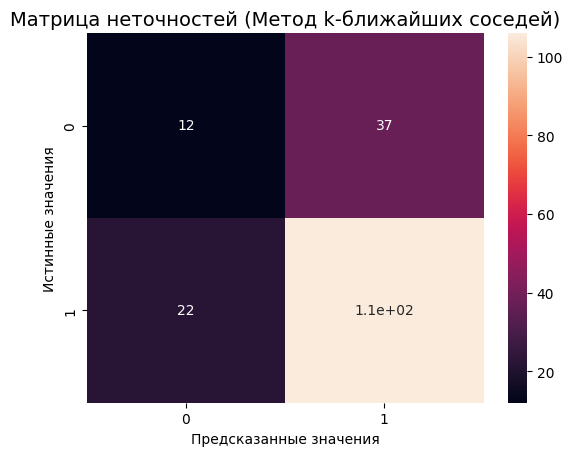

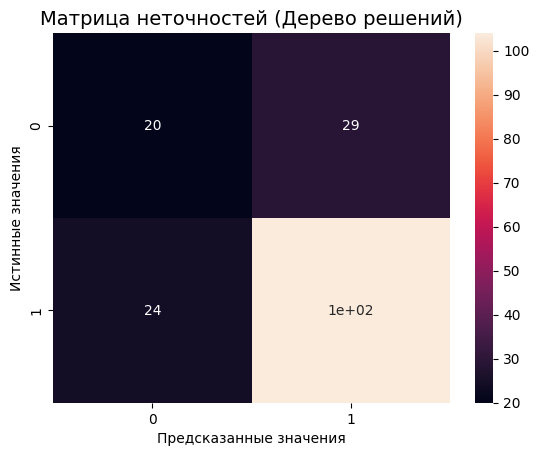

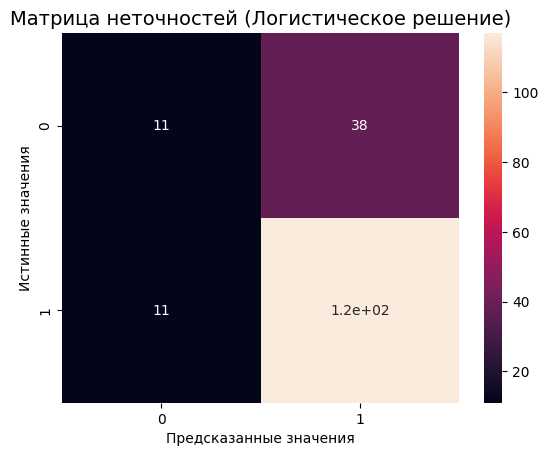

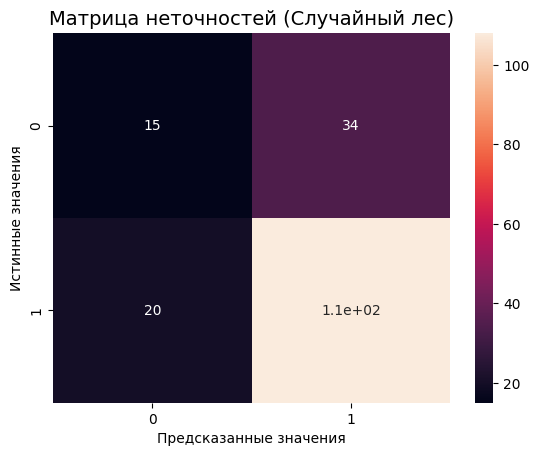

In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def printMatrix(model, X_valid, y_valid, model_name):
    y_pred = model.predict(X_valid) 
    cm = confusion_matrix(y_valid,y_pred)
    sns.heatmap(cm, annot=True)
    plt.title(f"Матрица неточностей ({model_name})", fontsize=14);
    plt.ylabel('Истинные значения')
    plt.xlabel('Предсказанные значения')
    plt.show()

printMatrix(knс_model, X_valid, y_valid, "Метод k-ближайших соседей")
printMatrix(dtc_model, X_valid, y_valid, "Дерево решений")
printMatrix(lr_model, X_valid, y_valid, "Логистическое решение")
printMatrix(rfc_model, X_valid, y_valid, "Случайный лес")

Из данных матриц также сложно выделить лучшую иодель, однако с уверенностью можно сказать, что меньше всего неправильно предсказанных значений у логистического решения - 49 штук, а на втором месте дерево решений - 53 штуки. У метода случайный лес - 54 штуки, а у метода k-ближайших соседей - 59.

Также был построен графики ROC-кривой для каждого метода на одном графике (4 линии на одном графике) для сравнения.

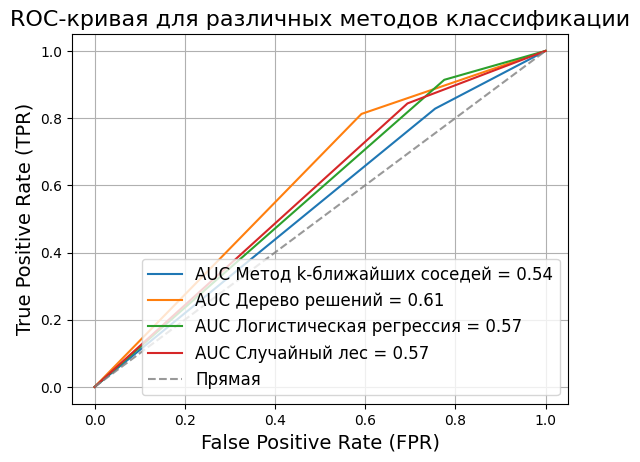

In [17]:
from sklearn.metrics import roc_curve, auc

models = [knс_model, dtc_model, lr_model, rfc_model]
model_names = ['Метод k-ближайших соседей', 'Дерево решений', 'Логистическая регрессия', 'Случайный лес']

# fpr, tpr, _ = roc_curve(y_valid, proba_clf[:,1])
# roc_auc  = auc(fpr, tpr)


for model, name in zip(models, model_names):
    y_pred = model.predict(X_valid)
    fpr, tpr, _ = roc_curve(y_valid, y_pred)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'AUC {name} = {round(roc_auc,2)}')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Прямая', alpha=0.8)
plt.title('ROC-кривая для различных методов классификации', fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()

ROC-кривая (`Receiver Operating Characteristic`) предоставляет визуальное представление производительности бинарного классификатора в различных точках порога классификации. Receiver Operating Characteristic. <br>
Чем ближе кривая к центру (диагональ), тем менее эффективен классификатор. В этом случае он может иметь высокую чувствительность, но также высокую ложноположительную оценку. В данном случае дальше всего от диагонали метод дерева решений, однако чем ближе излом кривой к правому верхнему углу, тем тоже медель лучше. В данном случае ближе всего к правому верхнему углу модель логистической регрессии.

### Дополнительное задание

Применить `StratifiedKFold` , получить результаты и сделать выводы. <br>
`StratifiedKFold` - это метод кросс-валидации, который обеспечивает стратификацию данных при разделении их на фолды. Это означает, что каждый фолд будет содержать примерно одинаковое соотношение классов, что особенно важно при работе с несбалансированными данными. Был использован `StratifiedKFold` с 5 фолдами, случайным лесом в качестве модели и был выведены результаты оценки, включая среднюю оценку по всем фолдам.

In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X, y, cv=stratified_kfold)

print("Результаты кросс-валидации:", scores)
print("Средняя оценка:", scores.mean())


Результаты кросс-валидации: [0.66101695 0.72033898 0.7008547  0.75213675 0.73504274]
Средняя оценка: 0.7138780240475155


Оценки для каждого фолда варьируются от 0.661 до 0.752. Это показывает, что производительность модели может различаться в зависимости от конкретного разбиения данных. Средняя оценка кросс-валидации равна примерно 0.714. Это представляет собой усредненную оценку производительности модели по всем фолдам, что говорит о том, что модель в среднем дает умеренно хорошие предсказания.

## Вывод

На основе проведенного анализа различных моделей машинного обучения для задачи бинарной классификации данных об обнаружении заболевания, можно сделать следующие выводы.<br>
В ходе лабораторной работы были рассмотрены и обучены четыре различных модели классификации: k-ближайших соседей (`KNeighborsClassifier`), дерево решений (`DecisionTreeClassifier`), логистическая регрессия (`LogisticRegression`) и случайный лес (`RandomForestClassifier`).<br>
Метрики оценки производительности моделей (`Accuracy`, `Precision`, `Recall`, `Balanced Accuracy` и `F1 Score`) позволяют оценить эффективность каждого метода. Исходя из результатов, лучшей моделью по показателям `Accuracy` и `F1 Score` стала логистическая регрессия. Она достигла точности в 72%, что означает, что более чем две трети предсказаний модели были верными. Важным показателем также является `Recall`, и здесь логистическая регрессия показала хороший результат - 91%, что означает, что модель смогла обнаружить большинство объектов положительного класса.<br>
Однако стоит отметить, что для каждой метрики лучшая модель различается. Например, по `Precision` лучшей оказалась модель дерева решений, а по `Balanced Accuracy` - модель случайного леса. Это подчеркивает важность анализа нескольких метрик, так как одна модель может быть лучше по одному показателю, но хуже по другим.<br>
Графики ROC-кривой также предоставляют полезную информацию о производительности моделей. Заметно, что ROC-кривая логистической регрессии ближе всего к верхнему левому углу, что указывает на хорошую способность различать классы. Дерево решений и случайный лес имеют более сглаженные кривые, но также демонстрируют хорошие результаты.<br>
Таким образом, логистическая регрессия выглядит наилучшей среди рассмотренных моделей для данной задачи. Однако, выбор модели может зависеть от конкретных требований задачи и приоритетов важности различных метрик.<br>